Q1

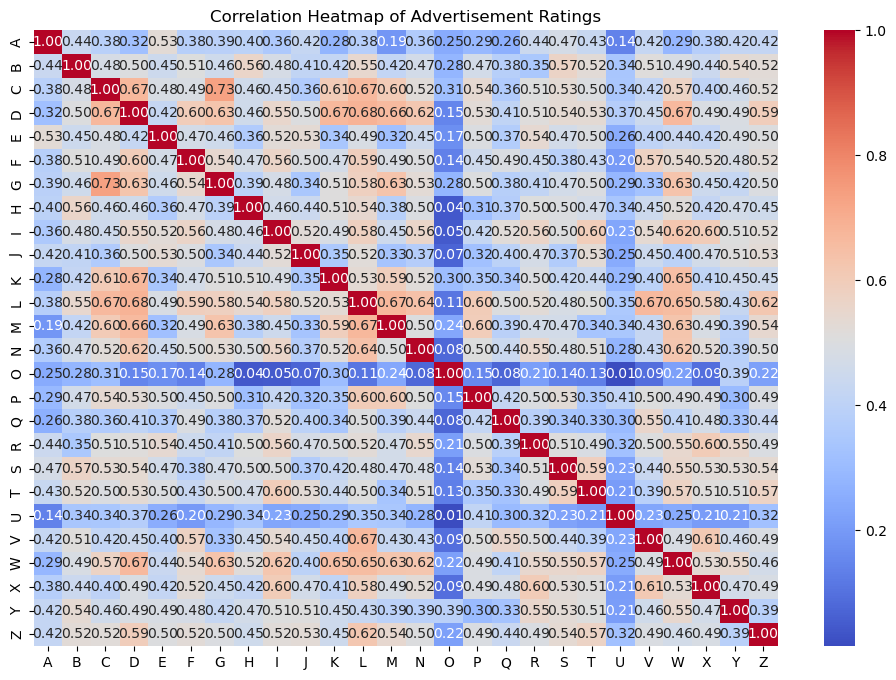

The participant with ID 'O' is the outlier with an average correlation of 0.20.


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("BRSM_Assignment_2_datasets.xlsx", sheet_name="Advert Rating")

# Calculate the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Advertisement Ratings')
plt.show()

# Find the participant with the lowest average correlation
average_corr = corr_matrix.mean()
outlier = average_corr.idxmin()
min_corr = average_corr.min()

print(f"The participant with ID '{outlier}' is the outlier with an average correlation of {min_corr:.2f}.")


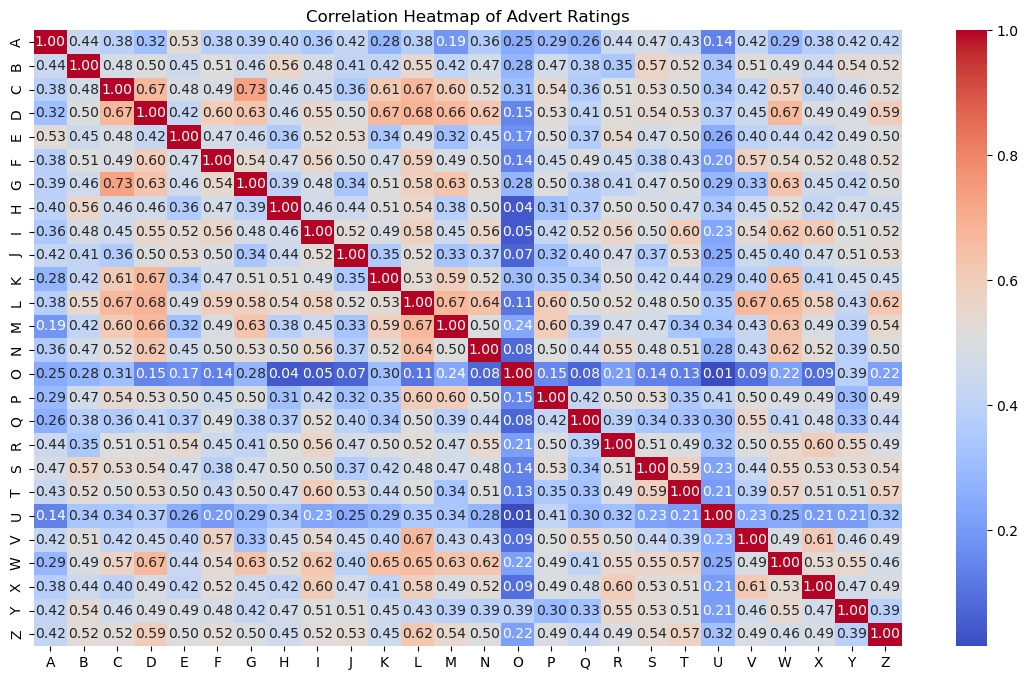

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("BRSM_Assignment_2_datasets.xlsx", sheet_name="Advert Rating")

df.head()
# Drop the participant column (assuming it's labeled A to Z)


# Compute the correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Advert Ratings')
plt.show()




In [24]:
# Compute average correlation for each participant
avg_corr_per_participant = corr.mean(axis=0)

# Print the average correlation for each participant
for participant, avg_corr in avg_corr_per_participant.items():
    print(f"Participant {participant}: Average Correlation = {avg_corr:.2f}")



print("\n")
# Find the participant(s) with lowest average correlation
outlier = corr.mean().idxmin()

print("Outlier participant(s):", outlier)
print("Average correlation:", corr.mean()[outlier])

Participant A: Average Correlation = 0.39
Participant B: Average Correlation = 0.48
Participant C: Average Correlation = 0.51
Participant D: Average Correlation = 0.54
Participant E: Average Correlation = 0.46
Participant F: Average Correlation = 0.49
Participant G: Average Correlation = 0.49
Participant H: Average Correlation = 0.45
Participant I: Average Correlation = 0.51
Participant J: Average Correlation = 0.44
Participant K: Average Correlation = 0.47
Participant L: Average Correlation = 0.56
Participant M: Average Correlation = 0.48
Participant N: Average Correlation = 0.49
Participant O: Average Correlation = 0.20
Participant P: Average Correlation = 0.46
Participant Q: Average Correlation = 0.41
Participant R: Average Correlation = 0.50
Participant S: Average Correlation = 0.48
Participant T: Average Correlation = 0.48
Participant U: Average Correlation = 0.30
Participant V: Average Correlation = 0.47
Participant W: Average Correlation = 0.53
Participant X: Average Correlation

Outlier participant(s): O
Average correlation: 0.19956783530913091

Q2

In [43]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# Load the data
file_path = "BRSM_Assignment_2_datasets.xlsx"
sheet_name = "Reliable Job"
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Extract JS and JP items
js_items = [col for col in df.columns if col.startswith('JS')]
jp_items = [col for col in df.columns if col.startswith('JP')]
js_items=js_items[:-1]
jp_items=jp_items[:-1]
# Calculate Spearman correlations between JS items
js_corr = df[js_items].corr(method='spearman')

# Calculate Spearman correlations between JP items
jp_corr = df[jp_items].corr(method='spearman')

# Function to calculate Cronbach's alpha
def cronbach_alpha(correlation_matrix):
    lower_triangle = correlation_matrix.where(np.tril(np.ones(correlation_matrix.shape), k=-1).astype(bool))
    mean_correlation = lower_triangle.stack().mean()
    num_items = correlation_matrix.shape[0]
    cronbach_alpha_JS = (num_items*mean_correlation) / (1 + (num_items-1)*mean_correlation)

    # cronbach_alpha_val = (num_items / (num_items - 1)) * (1 - (mean_correlation / (1 + mean_correlation)))
    return cronbach_alpha_JS

# Calculate Cronbach's alpha for JS
cronbach_js = cronbach_alpha(js_corr)

# Calculate Cronbach's alpha for JP
cronbach_jp = cronbach_alpha(jp_corr)

# Print Cronbach's alpha values
print("Cronbach's Alpha for Job Satisfaction :", cronbach_js)
print("Cronbach's Alpha for Job Performance :", cronbach_jp)
print("\n")
print('For Job Satisfaction')
if cronbach_js >= 0.7:
    print("The Cronbach's alpha value suggests good internal consistency.")
else:
    print("The Cronbach's alpha value suggests poor internal consistency.")
print("\n")
print("For Job Performance")
if cronbach_jp >= 0.7:
    print(" The Cronbach's alpha value suggests good internal consistency.")
else:
    print("The Cronbach's alpha value suggests poor internal consistency.")


Cronbach's Alpha for Job Satisfaction : 0.8584496719182925
Cronbach's Alpha for Job Performance : 0.524235103409064


For Job Satisfaction
The Cronbach's alpha value suggests good internal consistency.


For Job Performance
The Cronbach's alpha value suggests poor internal consistency.


Q3

In [47]:
df = pd.read_excel("BRSM_Assignment_2_datasets.xlsx", sheet_name="Yulu")
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [48]:
df.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


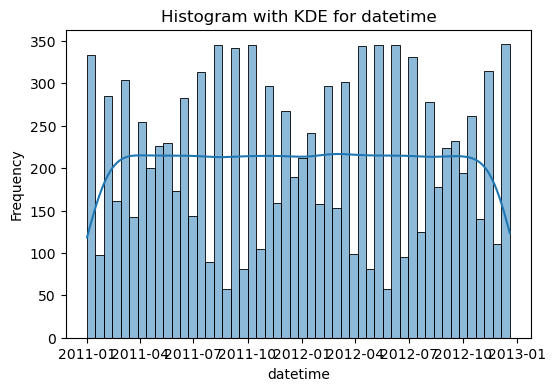

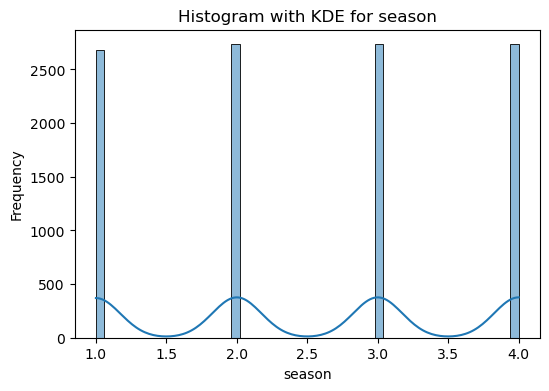

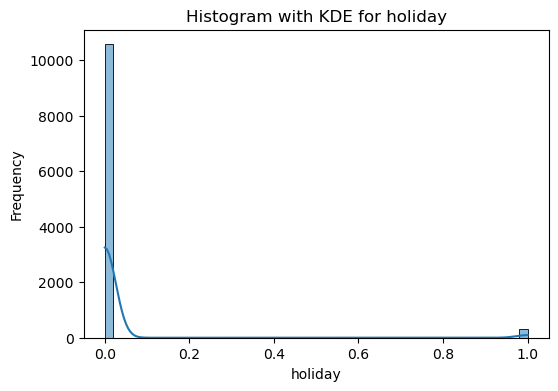

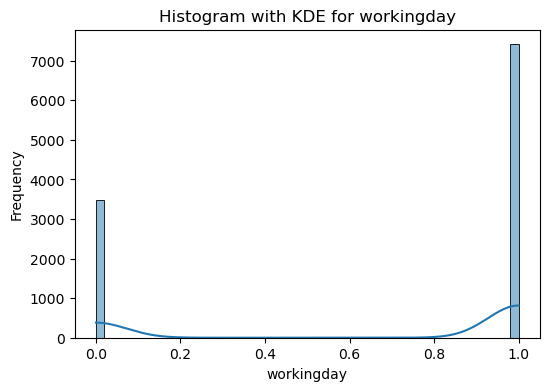

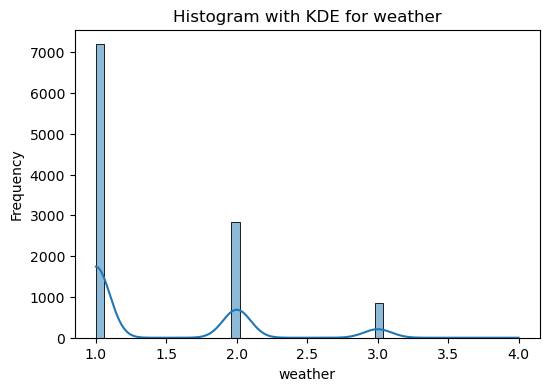

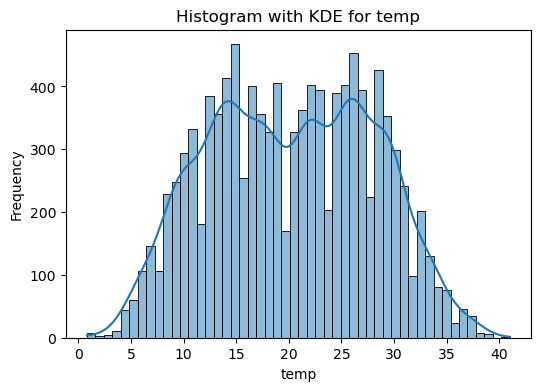

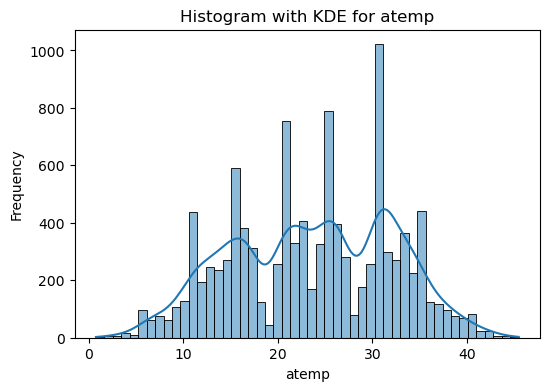

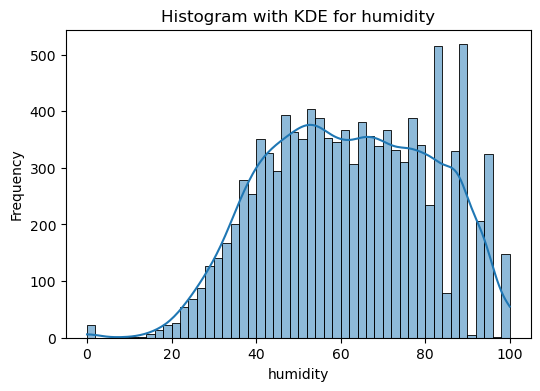

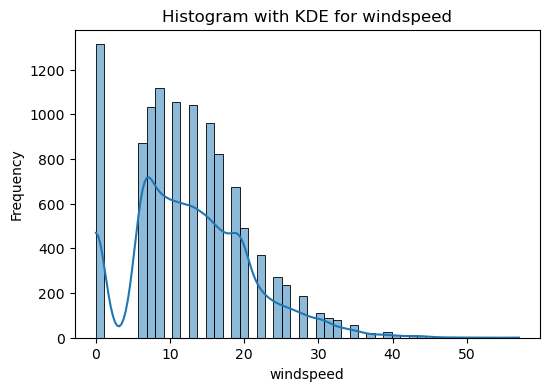

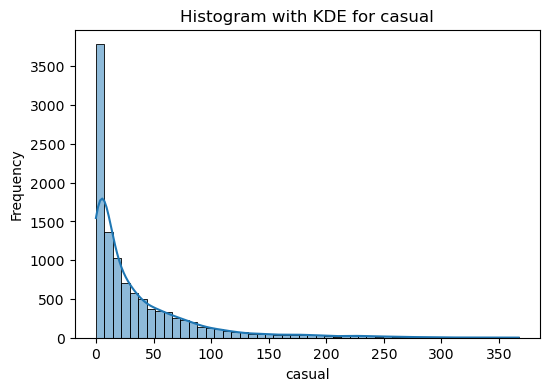

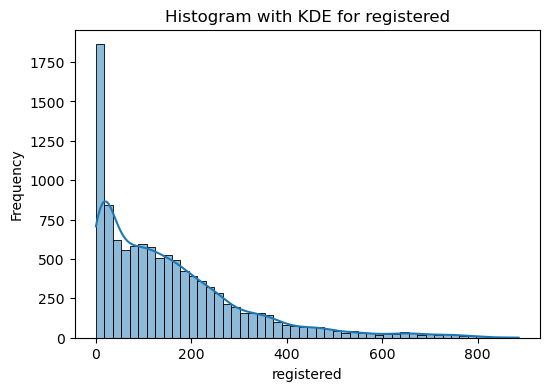

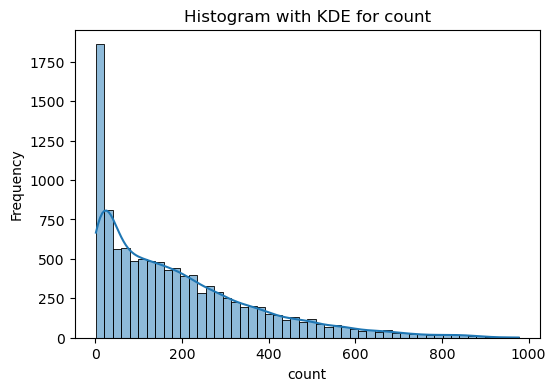

In [51]:

# Plot histogram with KDE for each column in separate plots
for col in df.columns:
    plt.figure(figsize=(6, 4))
    unique_values = df[col].nunique()
    # bins = min(unique_values, 50)
    sns.histplot(data=df, x=col, kde=True, bins=bins)
    plt.title(f'Histogram with KDE for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


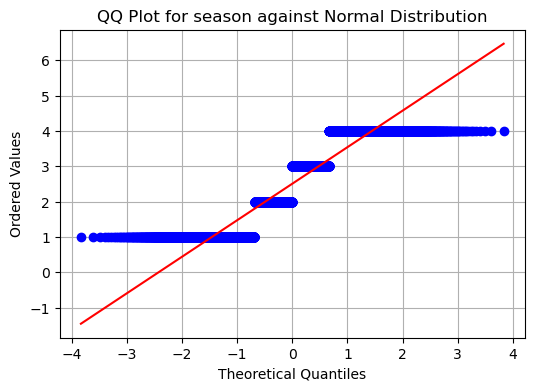

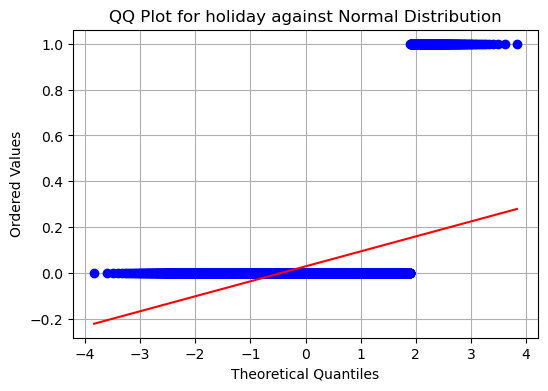

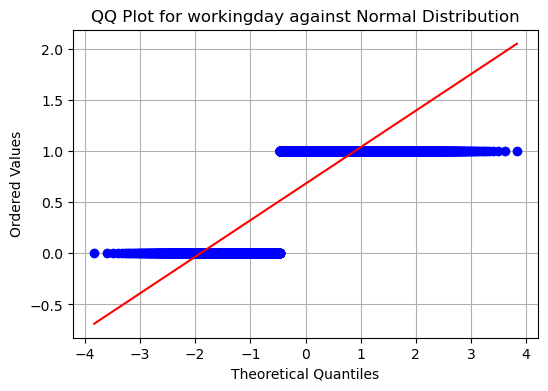

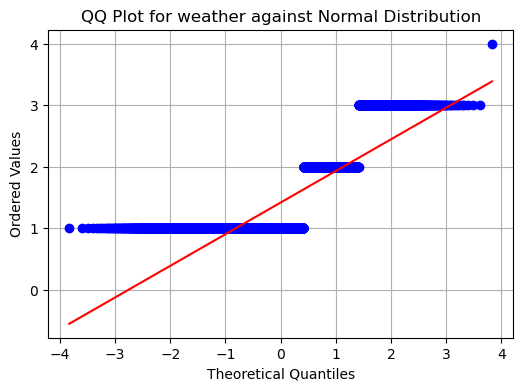

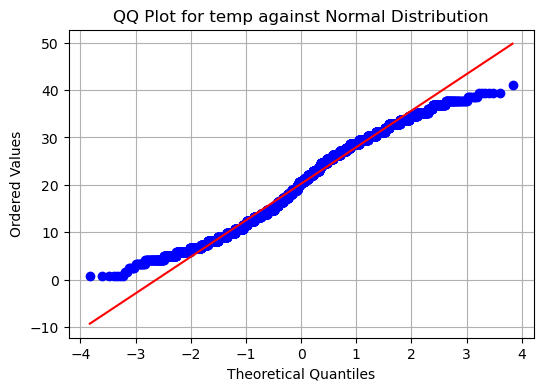

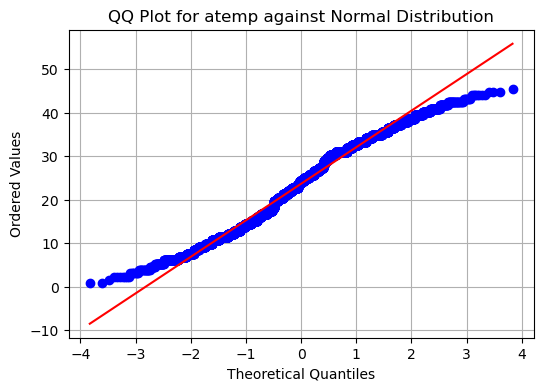

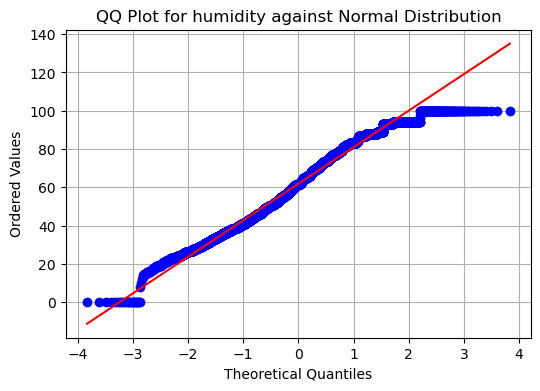

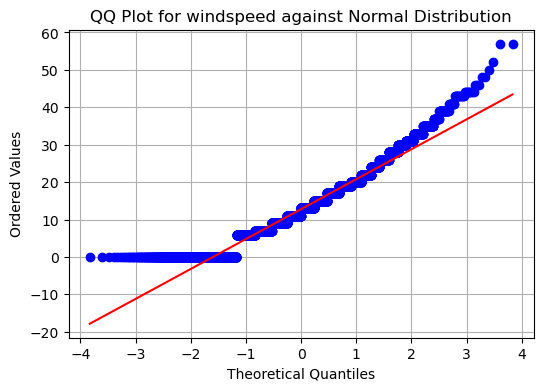

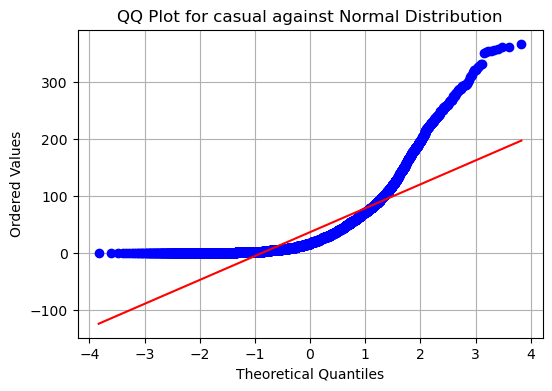

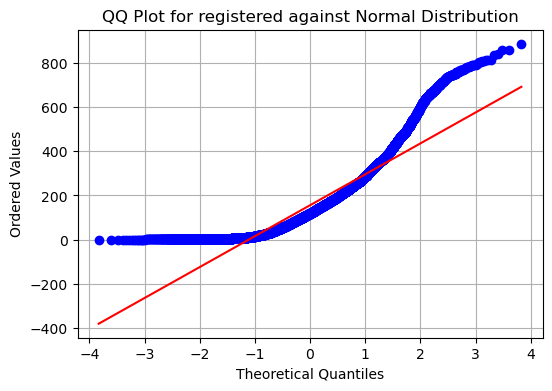

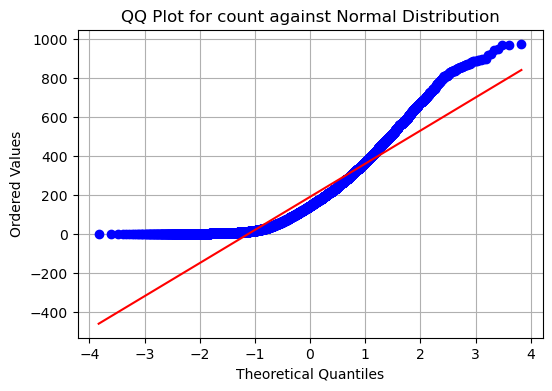

In [54]:
import scipy.stats as stats
for col in df.columns[1:]:
    plt.figure(figsize=(6, 4))
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'QQ Plot for {col} against Normal Distribution')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')
    plt.grid(True)
    plt.show()


It's easy to see that none of them look like a normal shape. You can tell because they don't match the straight line for a normal distribution.

In [55]:
#Shapiro test
import scipy.stats as stats
columns = df.columns[1:]
# Perform Shapiro-Wilk test for each column
for col in columns:
    # Sample the data for Shapiro-Wilk test (for performance)
    sample_data = df[col].sample(min(500, len(df[col])))
    stat, p_value = stats.shapiro(sample_data)
    #  significance level
    alpha = 0.05
    
    # Determine if the column follows a normal distribution based on the p-value
    if p_value > alpha:
        print(f"The data in column '{col}' follows a normal distribution (p-value: {p_value})")
    else:
        print(f"The data in column '{col}' does not follow a normal distribution (p-value: {p_value})")


The data in column 'season' does not follow a normal distribution (p-value: 2.79997628318163e-21)
The data in column 'holiday' does not follow a normal distribution (p-value: 5.2983094936121333e-42)
The data in column 'workingday' does not follow a normal distribution (p-value: 2.3933652729917185e-32)
The data in column 'weather' does not follow a normal distribution (p-value: 2.7880974985119675e-30)
The data in column 'temp' does not follow a normal distribution (p-value: 4.984012775821611e-07)
The data in column 'atemp' does not follow a normal distribution (p-value: 3.0943992896936834e-06)
The data in column 'humidity' does not follow a normal distribution (p-value: 8.65451329445932e-06)
The data in column 'windspeed' does not follow a normal distribution (p-value: 6.176658576967364e-12)
The data in column 'casual' does not follow a normal distribution (p-value: 3.3558850807727026e-29)
The data in column 'registered' does not follow a normal distribution (p-value: 6.368766913017246e

In [57]:
## Box-Cox transformation to make the data normally distributed

from scipy.stats import boxcox
#  function to perform Box-Cox transformation and check normality
def check_normality_and_boxcox(data):
    # Sample the data for Box-Cox transformation and Shapiro-Wilk test (for performance)
    sample_data = data.sample(min(5000, len(data)))
    
    # Perform Box-Cox transformation
    transformed_data, lambda_value = boxcox(sample_data + 1)  # Adding 1 to handle non-positive values
    _, p_value = stats.shapiro(transformed_data)
    #  significance level
    alpha = 0.05
    # Determine if the transformed data follows a normal distribution based on the p-value
    if p_value > alpha:
        print(f"The transformed data follows a normal distribution with (p-value: {p_value})")
    else:
        print(f"The transformed data does not follow a normal distribution with (p-value: {p_value})")
    
    return transformed_data, lambda_value

# Perform Box-Cox transformation and check normality for each column
for col in columns:
    print(f"\nColumn: {col}")
    transformed_data, lambda_value = check_normality_and_boxcox(df[col])
    print(f"Lambda value for Box-Cox transformation: {lambda_value}\n")



Column: season
The transformed data does not follow a normal distribution with (p-value: 0.0)
Lambda value for Box-Cox transformation: 0.6583237748086694


Column: holiday
The transformed data does not follow a normal distribution with (p-value: 0.0)
Lambda value for Box-Cox transformation: -49.071259441954545


Column: workingday
The transformed data does not follow a normal distribution with (p-value: 0.0)
Lambda value for Box-Cox transformation: 3.40619116591668


Column: weather
The transformed data does not follow a normal distribution with (p-value: 0.0)
Lambda value for Box-Cox transformation: -4.620604971885941


Column: temp
The transformed data does not follow a normal distribution with (p-value: 7.388343048402898e-25)
Lambda value for Box-Cox transformation: 0.8103228207734752


Column: atemp
The transformed data does not follow a normal distribution with (p-value: 3.296028494955747e-25)
Lambda value for Box-Cox transformation: 0.9648740013926105


Column: humidity
The tran

In [76]:
### Partiel Correlation
# !pip install pingouin
import pandas as pd
import pingouin as pg
import warnings

# warnings.filterwarnings("ignore")

# Drop any duplicate column names
df = df.loc[:, ~df.columns.duplicated()]

# Seleconly numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate partial correlations for all pairs of numeric variables
partial_correlations = pg.pairwise_corr(df[numeric_cols], method='pearson').round(5)

# Print the partial correlations

partial_correlations=partial_correlations[["X","Y","r"]]
partial_correlations.head()
print(partial_correlations)


             X           Y        r
0       season     holiday  0.02937
1       season  workingday -0.00813
2       season     weather  0.00888
3       season        temp  0.25869
4       season       atemp  0.26474
5       season    humidity  0.19061
6       season   windspeed -0.14712
7       season      casual  0.09676
8       season  registered  0.16401
9       season       count  0.16344
10     holiday  workingday -0.25049
11     holiday     weather -0.00707
12     holiday        temp  0.00029
13     holiday       atemp -0.00521
14     holiday    humidity  0.00193
15     holiday   windspeed  0.00841
16     holiday      casual  0.04380
17     holiday  registered -0.02096
18     holiday       count -0.00539
19  workingday     weather  0.03377
20  workingday        temp  0.02997
21  workingday       atemp  0.02466
22  workingday    humidity -0.01088
23  workingday   windspeed  0.01337
24  workingday      casual -0.31911
25  workingday  registered  0.11946
26  workingday       count  

Observation from semi-partial correlatio

Temperature and Atemp: The temperature and apparent temperature are strongly positively related, about 0.98. This means that even when we consider other factors, they're still very correlated, which makes sense because apparent temperature is based on temperature.


Temperature and Count: Both temperature and apparent temperature have quite strong positive connections with the total bike rental count, about 0.39-0.40. This means that warmer weather tends to lead to more bike rentals, even after we look at other factors.

Casual and Registered: The number of casual users and registered users are highly positively correlated, around 0.97. This suggests that both types of users contribute similarly to the total bike rentals, even when other factors are taken into account.

Workingday and Casual/Registered: On workdays, there are fewer casual rentals but more registered rentals compared to non-workdays. This means that whether it's a workday or not affects the type of rentals, with casual rentals decreasing and registered rentals increasing.

Humidity and Count: Higher humidity is linked to lower bike rental counts, with a negative correlation of about -0.32. This suggests that humidity might decrease the demand for bike rentals, even when we consider other influences.






In [78]:
import warnings
import pandas as pd
import pingouin as pg
warnings.filterwarnings("ignore")

# Drop any duplicate column names (if any)
df = df.loc[:, ~df.columns.duplicated()]

#  only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# semi-partial correlations for all pairs of numeric variables
semi_partial_correlations = {}
for col1 in numeric_cols:
    for col2 in numeric_cols:
        if col1 != col2:
            covariates = numeric_cols.drop([col1, col2]).tolist()
            semi_partial_corr = pg.partial_corr(data=df, x=col1, y=col2, covar=covariates)
            semi_partial_correlations[(col1, col2)] = semi_partial_corr['r'][0]


print("\nSemi-partial Correlations:")
for pair, corr in semi_partial_correlations.items():
    print(f"{pair}: {corr}")



Semi-partial Correlations:
('season', 'holiday'): 0.027594273500039304
('season', 'workingday'): -0.0270319080143487
('season', 'weather'): -0.05725045575263632
('season', 'temp'): 0.030301680830716722
('season', 'atemp'): 0.01080774497788034
('season', 'humidity'): 0.20233224371680722
('season', 'windspeed'): -0.07587691709161874
('season', 'casual'): -0.034128118598546614
('season', 'registered'): 0.07317921847236555
('season', 'count'): 0.027612508195049623
('holiday', 'season'): 0.0275942734938436
('holiday', 'workingday'): -0.24871507839611637
('holiday', 'weather'): 0.003978808585155719
('holiday', 'temp'): 0.041527538469284225
('holiday', 'atemp'): -0.03673930985179288
('holiday', 'humidity'): -0.017234159672498434
('holiday', 'windspeed'): 0.006250265179413979
('holiday', 'casual'): -0.06305092852041086
('holiday', 'registered'): 0.0600896395312626
('holiday', 'count'): -0.05948253017694866
('workingday', 'season'): -0.0270319080115004
('workingday', 'holiday'): -0.24871507840

Observation from semi-partial correlation

Season vs. Other Variables: The connection between the season and other factors seems weak. This means that the season doesn't have much of its own impact on these factors when we consider other influences.

Holiday vs. Workingday: Holidays and working days are strongly related, with a correlation of about -0.25. This suggests that when it's a holiday, it's less likely to be a working day, and vice versa.

Temperature vs. Atemp: Temperature and apparent temperature are almost the same thing, with a very strong correlation, nearly 1. This makes sense because apparent temperature is based on temperature and other factors.

Casual vs. Registered: The number of casual users and registered users are extremely closely linked, with a correlation of around 0.97. This means they share almost all their characteristics, even when we look at other factors.

Count vs. Casual/Registered: The total count of users is strongly linked to both casual and registered users, even after we consider other influences. This means that both types of users contribute significantly to the total count of users.




